In [ ]:
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Define function to load from a GeoTIFF file
def load_tif(filepath):
    """Load a single-band TIFF file as a numpy array."""
    with rasterio.open(filepath) as src:
        extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
        
        return src.read(1), src.transform, src.crs, extent

In [2]:
PATH = '../ExperimentData/'

band_paths = [PATH + 'LC08_L2SP_137044_20240309_20240316_02_T1_SR_B3.TIF', 
              PATH + 'LC08_L2SP_137044_20240309_20240316_02_T1_SR_B2.TIF',
              PATH + 'LC08_L2SP_137044_20240309_20240316_02_T1_SR_B1.TIF'
              ]

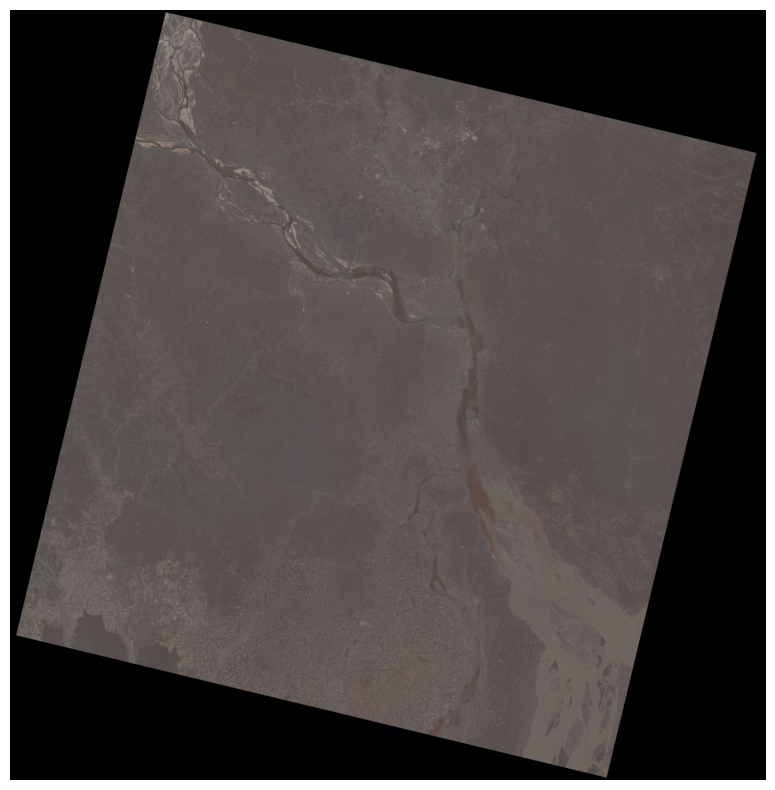

In [3]:
# Load each band and stack them
bands = []
for path in band_paths:
    with rasterio.open(path) as src:
        bands.append(src.read(1))  # Read the first band from each file

# Stack bands along the third dimension
stacked_image = np.dstack(bands)

# Optional: Normalize bands for better visualization
stacked_image = (stacked_image - stacked_image.min()) / (stacked_image.max() - stacked_image.min())

# Display the RGB composite (assuming a 3-band stack)
plt.figure(figsize=(10, 10))
plt.imshow(stacked_image[:, :, :3])  # Use first three bands as RGB
plt.axis('off')
plt.show()